In [1]:
from scipy.ndimage import imread
import numpy as np
import cairocffi as cairo
import io
import preproc
import detection
import chrecog
chrecog.load_ckpt("data/only_valid_160930.ckpt")
import reconst
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'Greys'

ckpt loaded


In [2]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        print ("Not RGB!")
        return rgb

def write_line(text, font="NanumGothic"):
    WIDTH, HEIGHT = 540, 100
    surface = cairo.ImageSurface (cairo.FORMAT_RGB24, WIDTH, HEIGHT)
    ctx = cairo.Context (surface)
    ctx.set_font_size(40)
    ctx.set_source_rgb(0, 0, 0)
    ctx.paint()
    ctx.set_source_rgb(1, 1, 1)
    ctx.select_font_face(font, cairo.FONT_SLANT_NORMAL,
                cairo.FONT_WEIGHT_NORMAL)
    ctx.move_to(20,40)
    ctx.show_text(text)
    fb = io.BytesIO()
    surface.write_to_png (fb)
    mat = imread(fb)
    fb.close()
    return rgb2gray(mat)

In [3]:
def test_line(text, font="NanumGothic"):
    img = write_line(text, font)
    plt.figure()
    plt.imshow(img)

    graphs = detection.get_graphs(img)

    i=0
    for p in graphs:
        for l in p.lines:
            for c in l.chars:
                if i % 10 == 0:
                    plt.figure()
                plt.subplot(1,10,i%10+1)
                plt.xticks(())
                plt.yticks(())
                plt.imshow(c.img)
                i += 1
                c.pred = chrecog.get_pred_one(c.img)

    print(reconst.build_graphs(graphs))

HeIIow아Id!안넝,세상!
====
(얼굴을붉히며)뭐?
====
서울대학교컴퓨터공학부
====
A에서B까지의거라[는4이다.
====
Wh사thefoxs.
====
10넌글읽ZJ를ZJ약하며
====


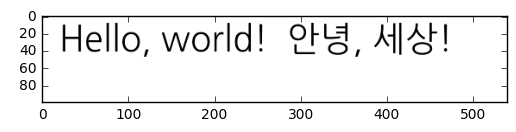

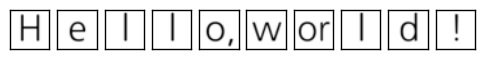

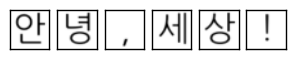

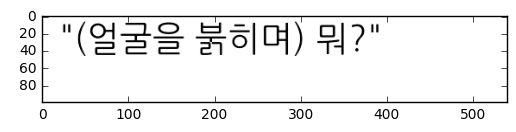

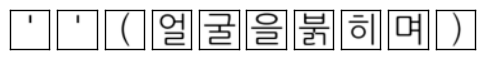

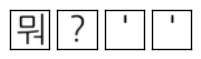

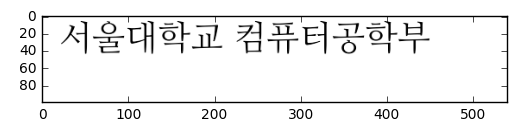

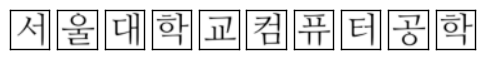

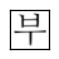

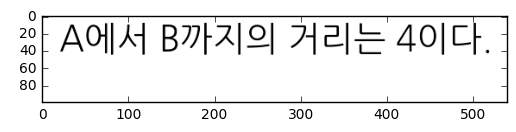

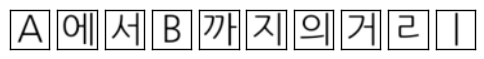

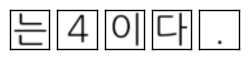

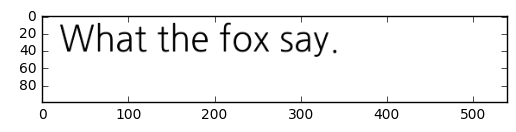

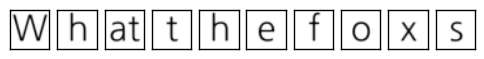

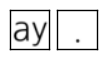

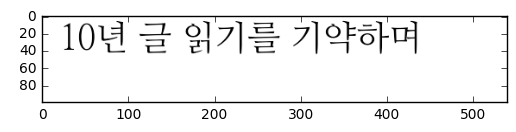

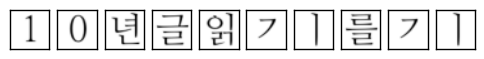

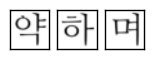

In [4]:
test_line("Hello, world!  안녕, 세상!")
test_line("\"(얼굴을 붉히며) 뭐?\"")
test_line("서울대학교 컴퓨터공학부", "NanumMyeongjo")
test_line("A에서 B까지의 거리는 4이다.")
test_line("What the fox say.")
test_line("10년 글 읽기를 기약하며", "NanumMyeongjo")